## Introduction:

 The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

## Questions:

1. Which genres are most popular from year to year? 
2. Which movie made the most profit?
3. What kinds of properties/characteristics are associated with movies that have high revenues? 


## Data Loading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read csv into df
tmdb = pd.read_csv('tmdb-movies.csv')

## Data Wrangling:

### Data Exploration:

In [4]:
#tmdb.iloc[0]
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
tmdb.dtypes
#tmdb.describe()

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Cleaning:

1. Remove duplicate records
2. Replace NaN with 0
3. Fix types of data:
        - Convert release_date field to date
        - Convert imdb_id to strin g
4. For the calcultion of profit; we can remove the records which doesn't have any value for revenue or budget
5. Remove any unwanted columns like budget_adj, revenue_adj


In [6]:
#Convert release_date to date value
tmdb['release_date'] = pd.to_datetime(tmdb.release_date)
#convert objects to String a needed
tmdb['imdb_id'] = tmdb['imdb_id'].str

In [7]:
#tmdb.isnull().any()
tmdb['genres'].isnull().sum()
#tmdb.isnull()

23

In [8]:
tmdb_duplicates = tmdb[tmdb.duplicated('id')]

In [9]:
tmdb_duplicates.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,<pandas.core.strings.StringMethods object at 0...,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [11]:
tmdb.loc[tmdb['id'] == 42194]
#tmdb.iloc[2089:2091] ##You can confirm once more with index values
#tmdb.count ## Good to have a way to print just the number of records

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,<pandas.core.strings.StringMethods object at 0...,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,<pandas.core.strings.StringMethods object at 0...,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [12]:
#Remove duplicate records
tmdb.drop_duplicates(subset='id',keep='first',inplace=True) ## need 'inplace = True' to drop the duplicate record

In [13]:
##List top 10 revenue generated movies

(tmdb.sort_values(by=["revenue"],ascending=[False])).head(20) ## You can use iloc or head to list a fixed number of recors


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,<pandas.core.strings.StringMethods object at 0...,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,<pandas.core.strings.StringMethods object at 0...,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,<pandas.core.strings.StringMethods object at 0...,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,<pandas.core.strings.StringMethods object at 0...,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,<pandas.core.strings.StringMethods object at 0...,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
4,168259,<pandas.core.strings.StringMethods object at 0...,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
14,99861,<pandas.core.strings.StringMethods object at 0...,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,A New Age Has Come.,...,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,12445,<pandas.core.strings.StringMethods object at 0...,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,It all ends here.,...,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,109445,<pandas.core.strings.StringMethods object at 0...,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,Only the act of true love will thaw a frozen h...,...,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09
542

In [13]:
#Highest Popularity Movies
(tmdb.sort_values(by=["popularity"],ascending=[False])).iloc[0:11]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,<pandas.core.strings.StringMethods object at 0...,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,<pandas.core.strings.StringMethods object at 0...,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,<pandas.core.strings.StringMethods object at 0...,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,<pandas.core.strings.StringMethods object at 0...,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,<pandas.core.strings.StringMethods object at 0...,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
631,100402,<pandas.core.strings.StringMethods object at 0...,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,http://www.captainamericathewintersoldiermovie...,Joe Russo|Anthony Russo,In heroes we trust.,...,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,11,<pandas.core.strings.StringMethods object at 0...,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",...,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
632,245891,<pandas.core.strings.StringMethods object at 0...,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,http://www.johnwickthemovie.com/,Chad Stahelski|David Leitch,Don't set him off.,...,"After the sudden death of his beloved wife, Jo...",101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07
3,140607,<pandas.core.strings.StringMethods object at 0...,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasf

In [14]:
tmdb['revenue'] = tmdb['revenue'].replace(np.NaN,0)

In [15]:
## Generate Average of numeric field
def average_value(column):
    return (tmdb[column].mean())

In [16]:
average_value('revenue')

39826896.07685228

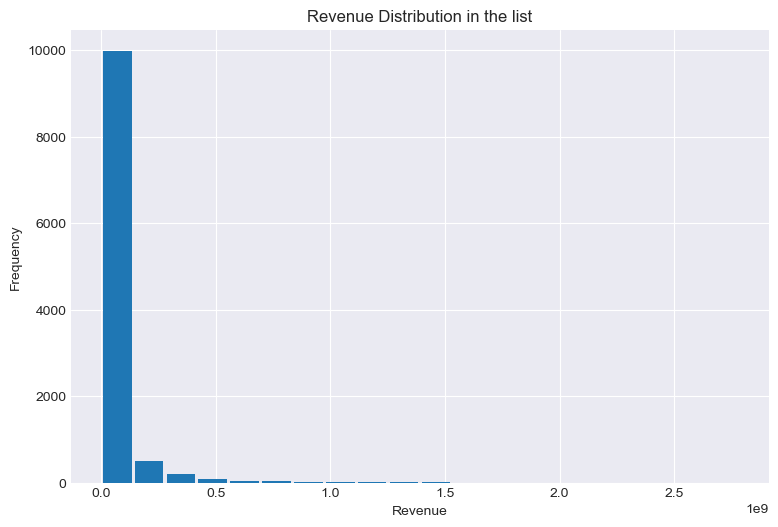

In [17]:
## Review on data through Plots
#Grid for the background
sn.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
#Giving figure size
plt.figure(figsize=(9,6), dpi=100)
#Setting xlabel
plt.xlabel("Revenue")
#Setting ylabel
plt.ylabel("Frequency")
#Setting Title
plt.title("Revenue Distribution in the list")
#giving histogram plot
plt.hist(tmdb['revenue'], rwidth= 0.9, bins=20)
#Show the plot
plt.show()

In [18]:
tmdb['runtime'] = tmdb['runtime'].replace(np.NaN,0)
tmdb['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [19]:
average_value('runtime')

102.07179015186378

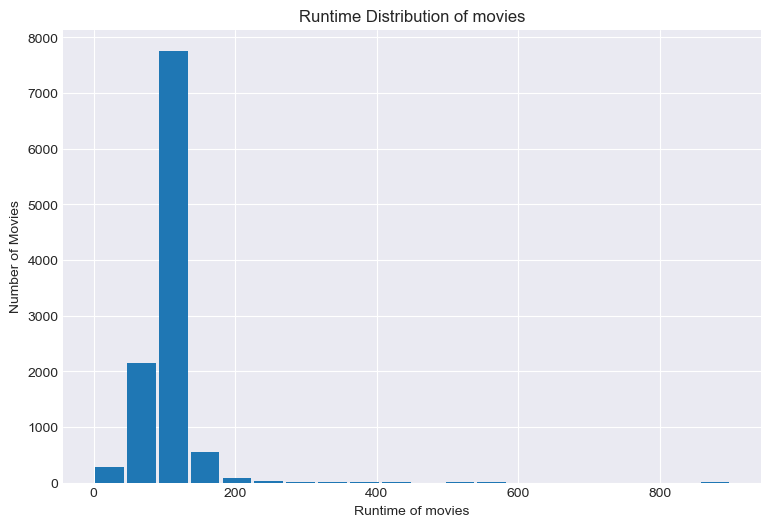

In [20]:
##Runtime distribution
sn.set_style('darkgrid')
#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
#Giving figure size
plt.figure(figsize=(9,6), dpi=100)
#Setting xlabel
plt.xlabel("Runtime of movies")
#Setting ylabel
plt.ylabel("Number of Movies")
#Setting Title
plt.title("Runtime Distribution of movies")
#giving histogram plot
plt.hist(tmdb['runtime'], rwidth= 0.9, bins=20)
#Show the plot
plt.show()

#### Let's dig deep and figure out the outliers of this distribution

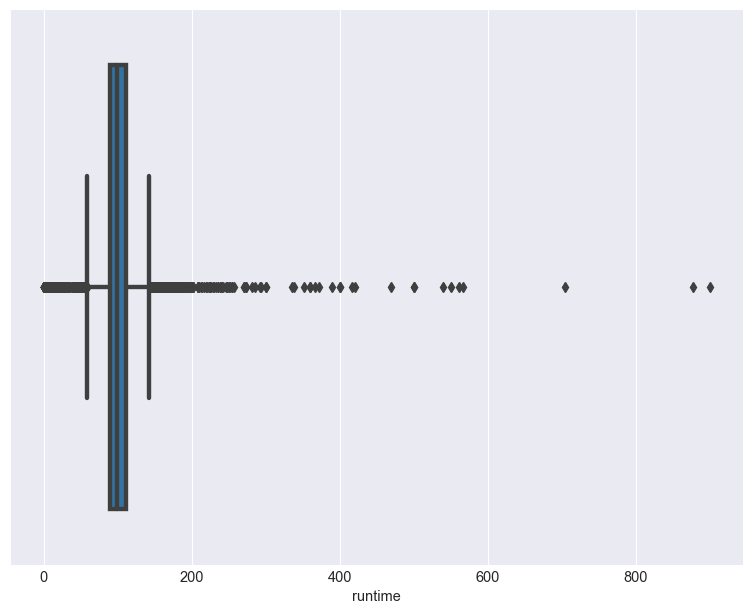

In [21]:
#giving two plots, thr first is the box plot, second is plots of runtime for movies
#giving figure size
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to plot
#plotting box plot
sn.boxplot(tmdb['runtime'], linewidth = 3)
#showing the plot
plt.show()

In [ ]:
## Need to fix it...it's not coming up
#plots the data points of runtime of movies

#giving figure size
##plt.figure(figsize=(10,5), dpi = 105)

##sn.swarmplot(tmdb['runtime'], color = 'gray')
##plt.show()

In [22]:
tmdb['revenue'].isnull().any()

False

In [33]:
tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [49]:
## count records with Value zero
#def countzeroVal():
#print(tmdb.count())
zerorevenue = 0
zerobudget = 0
for val in tmdb['revenue']:
    if (val == 0):
        #print(val)
        zerorevenue += 1
for val in tmdb['budget']:
    if (val == 0):
        zerobudget += 1
print ("There are {0} records with ZERO revenue".format(zerorevenue))
print ("There are {0} records with ZERO budget".format(zerobudget))


There are 6016 records with ZERO revenue
There are 5696 records with ZERO budget


We have many records with value ZERO for revenue and budget. Now we need to drop all those record.

In [95]:
#Copy data to another df and clean up the records and columns for profit calculation
#profit_tmdb = tmdb
#profit_tmdb.count()
# Easy way to drop is to replace 0 to NaN and use dropna
#profit_tmdb['revenue'] = profit_tmdb['revenue'].replace('NaN',0)
#profit_tmdb.dropna(axis=0, how='any')
#profit_tmdb.dropna(subset=['revenue','budget'])
profit_tmdb['revenue']

0        1513528810
1         378436354
2         295238201
3        2068178225
4        1506249360
5         532950503
6         440603537
7         595380321
8        1156730962
9         853708609
10        880674609
11        183987723
12         36869414
13        243637091
14       1405035767
15        155760117
16        325771424
17        518602163
18        542351353
19        650523427
20        209035668
21         91709827
22        470490832
23        569651467
24        133346506
25        682330139
26        215863606
27        403802136
28         88346473
29        311256926
            ...    
10836             0
10837             0
10838             0
10839             0
10840             0
10841             0
10842             0
10843             0
10844             0
10845             0
10846             0
10847             0
10848      12000000
10849             0
10850             0
10851             0
10852             0
10853             0
10854             0


In [76]:
profit_tmdb.drop(['imdb_id','homepage','tagline','overview','production_companies','budget_adj','revenue_adj'],axis=1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


In [97]:
df_revenue = pd.to_numeric(profit_tmdb['revenue'])
profit_tmdb['revenue'] = df_revenue
profit_tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [98]:
#assigning a new column which will hold the profit values of each movie

#the insert function's first argument is an index number given to locate the column, second argument takes the name of the new column...
#...and last but not least it takes the calculation values to output for specific column

#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
profit_tmdb.insert(2, 'profit', profit_tmdb['revenue'] - profit_tmdb['budget'],True)

#for just in case situations or for convenience, we change the data type to int
profit_tmdb['profit'] = profit_tmdb['profit'].apply(np.int64)

#showing the dataset
profit_tmdb.head()

,id,imdb_id,profit,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,<pandas.core.strings.StringMethods object at 0...,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,<pandas.core.strings.StringMethods object at 0...,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,<pandas.core.strings.StringMethods object at 0...,185238201,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,<pandas.core.strings.StringMethods object at 0...,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,<pandas.core.strings.StringMethods object at 0...,1316249360,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [130]:
#Remove ZERO profit records
#profit = 0
profit_tmdb = profit_tmdb[profit_tmdb.profit != 0]
        

In [131]:
profit_tmdb['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
5         397950503
6         285603537
7         487380321
8        1082730962
9         678708609
10        635674609
11          7987720
12         21869414
13        155637091
14       1125035767
15        111760117
16        277771424
17        388602163
18        447351353
19        490523427
20         19035668
21         61709827
22        360490832
23        529651467
24        105346506
25        532330139
26        147863606
27        322802136
28         68346473
29        250256926
            ...    
10779      10765081
10780      20546533
10781       -660000
10782     -10000000
10784       -650000
10787      16393000
10788      -2950947
10790      -2700000
10791      19718355
10793       2713768
10795      -3000000
10800     -11000000
10802      -6727000
10810        -90000
10812       5438927
10815      -3000000
10817        321952
10819      78000000
10820       -315000


In [105]:
#profit_tmdb['profit'] = profit_tmdb['profit'].replace('NaN',0)
#profit_tmdb.dropna(axis=0, how='any')
#profit_tmdb.dropna(subset=['profit'])
#profit_tmdb['profit']

In [150]:
#Let's define a function which calculates lowest and highest values of columns
#taking column name as arguments

def highest_lowest(column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = profit_tmdb[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(profit_tmdb.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = profit_tmdb[column_name].idxmin()
    lowest_details = pd.DataFrame(profit_tmdb.loc[lowest_id])
    
    #concatenating two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

#calling the function and passing the argument


In [135]:
print("movies made the most and least profit are \n")
print(format(highest_lowest('profit')))

movies made the most and least profit are 

                                                                   1386  \
id                                                                19995   
imdb_id               <pandas.core.strings.StringMethods object at 0...   
profit                                                       2544505847   
popularity                                                      9.43277   
budget                                                        237000000   
revenue                                                      2781505847   
original_title                                                   Avatar   
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
homepage                                    http://www.avatarmovie.com/   
director                                                  James Cameron   
tagline                                     Enter the World of Pandora.   
keywords              culture clash|future|space war|spa

In [142]:
profit_tmdb['genres'] 

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

In [151]:
#since we have multiple questions answers being similar in logic and code, we will give function which will make our life easier

#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = tmdb[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [152]:
## Most frequesnt genres values

gen_count = extract_data('genres')
gen_count.head(10)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

#### Let's put it down in a chart

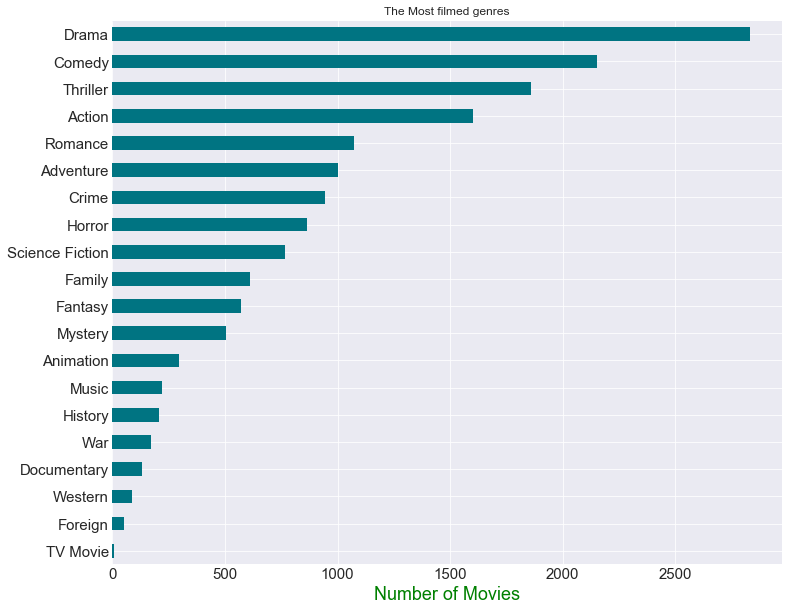

In [147]:
#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
gen_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = gen_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

In [153]:
# Top Castings
gen_count = extract_data('cast')
gen_count.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
dtype: int64

In [154]:
# Top Directors
gen_count = extract_data('director')
gen_count.head(10)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Tim Burton           20
Brian De Palma       20
dtype: int64

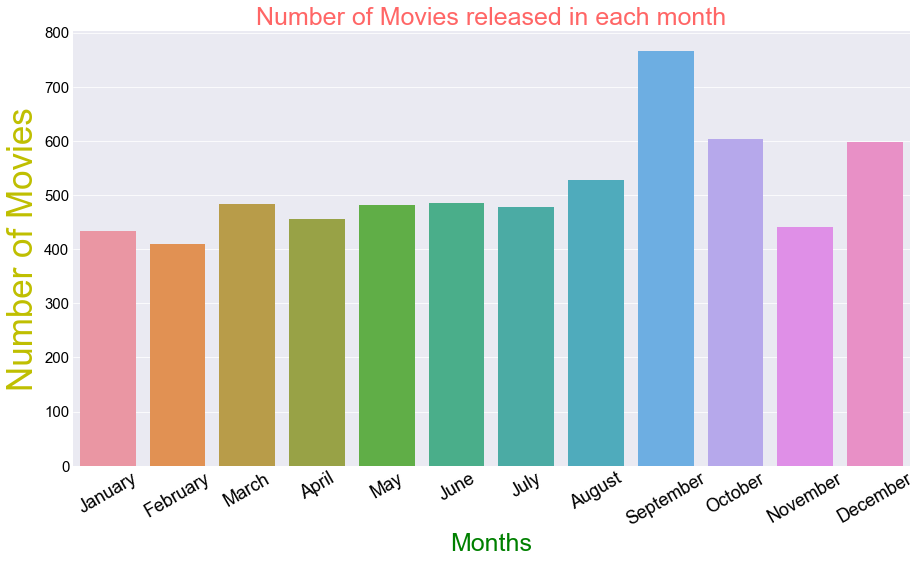

In [156]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_tmdb.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index.profit.count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sn.barplot(x = monthly_movie_count.index, y = monthly_movie_count.profit, data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

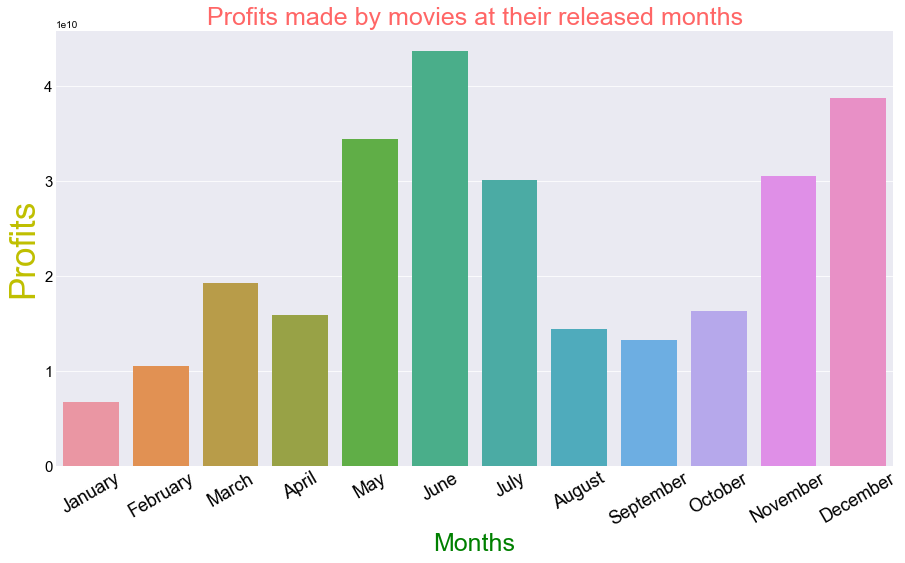

In [157]:

#now since the data is grouped by month, we add 'profit' values to respective months, saving all this to a new var
monthly_profit = groupby_index.profit.sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sn.barplot(x = monthly_profit.index, y = monthly_profit.profit, data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()


## Conclusion:

To wrap the answers of the questions I was exploring:
    
    1. If i wanted to show one of the best and most profitable movie, who would i hire as director and cast, which genre would i choose and also at what month would i release the movie in?
    Ans: 
    - One of the the following director: Woody Allen, Clint Eastwood, Martin Scorsese, Steven Spielberg, Ridley Scott, Steven Soderbergh
    - One of the following cast:  Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Michael Caine
    - One of the following Genres: Drama, Comedy, Thriller, Action, Romance
    - Release in one of the following month: May, June, July, November, December
From my observation a combination of all these values has a high probability of making good profit.

## Limitation:

I am recommeding this model to get the maximum progit based on my observations on the available data. But there can be an impact from other factors like:

- Story of the movie and visualtizations can have a mjor impact
- The level of expectation for people from this directors and casts can be high. So it is kind of difficult to meet those higher expectations
